In [5]:
!pip install tensorflow 
!pip install tensorflow keras 
!pip install tensorflow sklearn 
!pip install tensorflow matplotlib 
!pip install tensorflow pandas 
!pip install tensorflow pil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=de1ffb847bf1288cea525068f50c36a238d4dc03f1dfbc87a6a39e71c94ae4e5
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pil (from versions: none)
ERROR: No matching distributio

In [6]:
import numpy as np

In [7]:
import os 
cur_path = os.getcwd() 

In [8]:
cur_path

'/content'

In [16]:
path_cur = os. path.join(cur_path,'drive/MyDrive/traffic_sign')

In [17]:
path_cur

'/content/drive/MyDrive/traffic_sign'

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os 
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43 
cur_path = os.getcwd() 
for i in range(classes): 
  path = os. path.join(path_cur,'Train', str(i)) 
  images = os.listdir(path) 
  for a in images: 
    try:
      image = Image.open(path + '/' + a) 
      image = image.resize((30,30)) 
      image = np.array(image) 
      data.append(image) 
      labels.append(i) 
    except: 
        print("Error loading image") 
data = np.array(data)
labels = np.array(labels)

In [20]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)

(39279, 30, 30, 3) (39279,)
(31423, 30, 30, 3) (7856, 30, 30, 3) (31423,) (7856,)


In [21]:
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

In [23]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model_fit = model.fit(X_t1, y_t1, batch_size=32, epochs=15, validation_data=(X_t2, y_t2))

Epoch 1/15
982/982 [==============================] - 89s 90ms/step - loss: 2.1363 - accuracy: 0.4576 - val_loss: 0.8736 - val_accuracy: 0.7755
Epoch 2/15
982/982 [==============================] - 85s 87ms/step - loss: 0.9391 - accuracy: 0.7280 - val_loss: 0.4073 - val_accuracy: 0.8866
Epoch 3/15
982/982 [==============================] - 86s 88ms/step - loss: 0.5902 - accuracy: 0.8247 - val_loss: 0.2276 - val_accuracy: 0.9428
Epoch 4/15
982/982 [==============================] - 87s 88ms/step - loss: 0.4550 - accuracy: 0.8629 - val_loss: 0.1507 - val_accuracy: 0.9560
Epoch 5/15
982/982 [==============================] - 86s 87ms/step - loss: 0.3821 - accuracy: 0.8874 - val_loss: 0.1399 - val_accuracy: 0.9576
Epoch 6/15
982/982 [==============================] - 87s 88ms/step - loss: 0.3414 - accuracy: 0.8995 - val_loss: 0.1191 - val_accuracy: 0.9647
Epoch 7/15
982/982 [==============================] - 85s 87ms/step - loss: 0.3521 - accuracy: 0.9005 - val_loss: 0.0946 - val_accuracy:

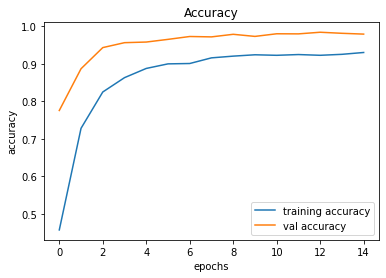

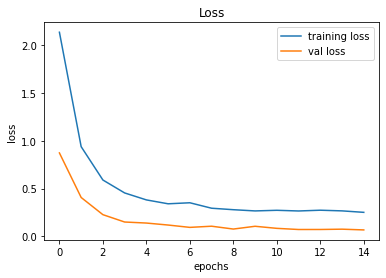

In [28]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(model_fit.history['accuracy'], label='training accuracy')
plt.plot(model_fit.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(model_fit.history['loss'], label='training loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [40]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('/content/drive/MyDrive/traffic_sign/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
   image = Image.open('/content/drive/MyDrive/traffic_sign/'+img)
   image = image.resize((30,30))
   data.append(np.array(image))
X_test=np.array(data)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

395/395 [==============================] - 8s 20ms/step


In [41]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels,classes_x))

0.9433095803642122


In [43]:
model.save('/content/drive/MyDrive/traffic_sign/traffic_classifier.h5') #to save